<p align="center">
  <img src="https://github.com/deel-ai/xplique/blob/master/docs/assets/banner.png?raw=true"/>
</p>

---

- 📘 <a href="https://deel-ai.github.io/xplique"> Documentation </a>
- <img src="https://github.githubassets.com/images/icons/emoji/octocat.png" width=20> <a href="https://github.com/deel-ai/xplique"> Github </a>
- 🦊 <a href="https://github.com/deel-ai/xplique/blob/master/TUTORIALS.md"> More Xplique tutorials </a>

---
# 👋 Welcome to the **Regression and Tabular Data** for Attribution method tutorial

The objective of this notebook is to apply the Xplique library to a regression problem with tabular data. Here we will use the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and use the Tensorflow [tutorial](https://www.tensorflow.org/tutorials/keras/regression) to build a DNN model for it.

In [1]:
#!pip install -q xplique

## Build the Use Case
We will follow the Tensorflow Tutorial from here

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### Get the data

In [4]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#                 'Acceleration', 'Model Year', 'Origin']

# raw_dataset = pd.read_csv(url, names=column_names,
#                           na_values='?', comment='\t',
#                           sep=' ', skipinitialspace=True)

In [5]:
# dataset = raw_dataset.copy()
# dataset.tail()

### Clean the data

In [6]:
# # the dataset contains na value, we just drop them
# dataset = dataset.dropna()
# # the origin column is not numeric so we convert it to a one hot-hot
# dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
# dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
# dataset.tail()

### Split the data into train and test

In [7]:
# train_dataset = dataset.sample(frac=0.8, random_state=0)
# test_dataset = dataset.drop(train_dataset.index)

### Split features from labels

In [8]:
# train_features = train_dataset.copy()
# test_features = test_dataset.copy()

# train_labels = train_features.pop('MPG')
# test_labels = test_features.pop('MPG')

### Normalize data
The features have different range of value, so it is a good practice to normalize them. So before doing anything we will use sklearn StandardScaler on our data

In [9]:
# from sklearn.preprocessing import StandardScaler

In [10]:
# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features.values)
# test_features = scaler.transform(test_features.values)


### DNN Regression
It is now time to implements single-input and multiple-inputs DNN models

In [11]:
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

req_cols = [ ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
' Max Packet Length',' Label']
#---------------------------------------------------------------------
#Load Databases from csv file
print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')


df0 = pd.read_csv ('cicids_db/Wednesday-workingHours.pcap_ISCX.csv', usecols=req_cols)

df1 = pd.read_csv ('cicids_db/Tuesday-WorkingHours.pcap_ISCX.csv', usecols=req_cols)

df2 = pd.read_csv ('cicids_db/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', usecols=req_cols)

df3 = pd.read_csv ('cicids_db/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=req_cols)

df4 = pd.read_csv ('cicids_db/Monday-WorkingHours.pcap_ISCX.csv', usecols=req_cols)

df5 = pd.read_csv ('cicids_db/Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=req_cols)

df6 = pd.read_csv ('cicids_db/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=req_cols)

df7 = pd.read_csv ('cicids_db/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=req_cols)


frames = [df0, df1, df2, df3, df4, df5,df6, df7]

df = pd.concat(frames,ignore_index=True)

df = df.sample(frac = 0.01)
#---------------------------------------------------------------------
# Normalize database
print('---------------------------------------------------------------------------------')
print('Normalizing database')
print('---------------------------------------------------------------------------------')
print('')

df_max_scaled = df.copy()

y = df_max_scaled[' Label'].replace({'DDoS' :'Dos/Ddos' ,'DoS GoldenEye': 'Dos/Ddos', 'DoS Hulk': 'Dos/Ddos', 'DoS Slowhttptest': 'Dos/Ddos', 'DoS slowloris': 'Dos/Ddos', 'Heartbleed': 'Dos/Ddos','FTP-Patator': 'Brute Force', 'SSH-Patator': 'Brute Force','Web Attack - Brute Force': 'Web Attack', 'Web Attack - Sql Injection': 'Web Attack', 'Web Attack - XSS': 'Web Attack'})

df_max_scaled.pop(' Label')


df_max_scaled
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
print('---------------------------------------------------------------------------------')
result_list = [counter['None'],counter['Denial of Service'], counter['Port Scanning']]
print('number of Labels  ',result_list)
print('---------------------------------------------------------------------------------')

df = X.assign( Label = y)

#---------------------------------------------------------------------

# Separate Training and Testing db
print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

# y = df_train.pop('ALERT')
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .70
#print(df.head())

train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Number of the training data:', len(train))
print('Number of the testing data:', len(test))

features = df.columns[:len(req_cols)-1]

y_train, label = pd.factorize(train['Label'])
y_test, label = pd.factorize(test['Label'])

#---------------------------------------------------------------------
# Defining the DNN model

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(req_cols)-1,)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(7))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()
#---------------------------------------------------------------------

#Training Model

print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')


#print(train[features])
#print(y_train)
#START TIMER MODEL
start = time.time()
model.fit(train[features], y_train, epochs=5, batch_size=1024)
end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------

loss_per_epoch = model.history.history['loss']
#print(plt.plot(range(len(loss_per_epoch)),loss_per_epoch))

#---------------------------------------------------------------------



---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------



/home/oarreche@ads.iu.edu/anaconda3/envs/HITL/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Normalizing database
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Separating features and labels
---------------------------------------------------------------------------------

Counter({'BENIGN': 22824, 'Dos/Ddos': 3710, 'Port

In [39]:

print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(test[features])
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(test[features], y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

#---------------------------------------------------------------------
# pd.crosstab(test['ALERT'], preds, rownames=['Actual ALERT'], colnames = ['Predicted ALERT'])

---------------------------------------------------------------------------------
Model Prediction
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
ELAPSE TIME MODEL PREDICTION:  0.004053513209025065 min
---------------------------------------------------------------------------------

269/269 [==============================] - 0s 1ms/step - loss: 1.9323


In [12]:
# def build_and_compile_model():
#   model = keras.Sequential([
#       layers.Dense(64, activation='relu'),
#       layers.Dense(64, activation='relu'),
#       layers.Dense(1)
#   ])

#   model.compile(loss='mean_absolute_error',
#                 optimizer=tf.keras.optimizers.Adam(0.001))
#   return model

Now if we use the previous normalization layer we will build a DNN model for the full dataset

In [13]:
# dnn_model = build_and_compile_model()

In [23]:
dnn_model = model

In [19]:
%%time
train_features = train[features]
train_labels = y_train
history = model.fit(
#history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 27s, sys: 7.64 s, total: 1min 34s
Wall time: 1min 20s


### Visualize model's training

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

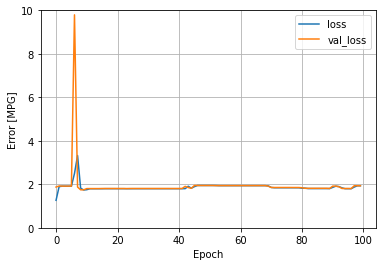

In [21]:
plot_loss(history)

### Make predictions


In [93]:

test_features = test[features]
test_labels = y_test
#test_predictions = y_pred

In [96]:
print(len(test_features))
print(len(test_labels))
#print(len(test_predictions))

8596
8596


In [88]:
test_labels

array([0, 0, 0, ..., 2, 0, 0])

In [105]:
#test_predictions.flatten()
60172/8596

7.0

In [110]:
vec = []
for i in range (len(test_labels)):
    for j in range(7):
        vec.append(test_labels[i])

test_labels = vec  

60172
60172


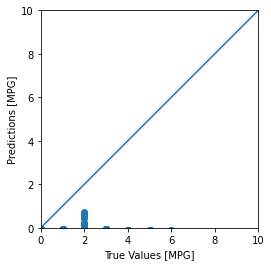

In [120]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')


print(len(test_predictions))
print(len(test_labels))

plt.scatter(test_labels, test_predictions)

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

lims = [0, 10]

plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

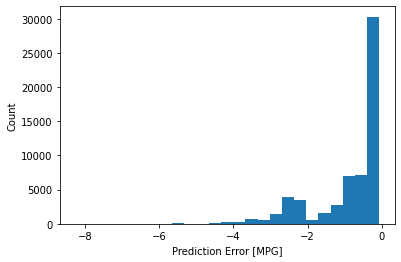

In [112]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

## Explain a Regression model (with Xplique)

We now have at our disposal a model trained for a regression task and we would like to use the Xplique library in order to have some highlights towards it. First, let's load this model and import the xplique library.

In [113]:
from xplique.attributions import (Saliency,
                             IntegratedGradients,
                             KernelShap,
                             Lime,
                             Occlusion,
                             SmoothGrad,
                             VarGrad,
                             SquareGrad,
                             GuidedBackprop,
                             DeconvNet,
                             GradientInput
)

In [121]:
inputs_tf, targets_tf = tf.cast(test_features, tf.float32), tf.cast(test_labels, tf.float32)
targets_tf = tf.expand_dims(targets_tf, axis=-1)
new_targets_tf = tf.ones((8596 ,1))

In [122]:
methods_params = [
    ("Saliency", Saliency, {}),
    ("Integrated Gradients", IntegratedGradients, {}),
    ("KernelShap", KernelShap, {}),
    ("Lime", Lime, {}),
    ("Occlusion", Occlusion, {"patch_size": 1, "patch_stride": 1}),
    ("SmoothGrad", SmoothGrad, {}),
    ("VarGrad", VarGrad, {}),
    ("SquareGrad", SquareGrad, {}),
    ("GuidedBackprop", GuidedBackprop, {}),
    ("DeconvNet", DeconvNet, {}),
    ("GradientInput", GradientInput, {})
]

In [123]:
# get the different explanations
explanations = []

for name, Cls, params in methods_params:

    explainer   = Cls(dnn_model, **params)
    explanation = explainer(inputs_tf, new_targets_tf)

    explanations.append((name, explanation))

Now we will have a look at our results

In [124]:
features_name= [
    'Cylinders',
    'Displacement',
    'Horsepower',
    'Weight',
    'Acceleration',
    'Model Year',
    'Europe',
    'Japan',
    'USA'
]

features_name = [ ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
' Max Packet Length']

In [125]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular

### On a single sample

In [141]:
exp[0]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([5.001, 4.094, 0.132, 1.117, 0.608, 0.191, 2.575, 0.18 , 2.794,
       0.83 , 0.493, 4.22 , 0.551, 5.961, 2.397], dtype=float32)>

In [144]:
test_features2 = test_features.values


In [148]:
#test_features2[0]

0.006761397457226148

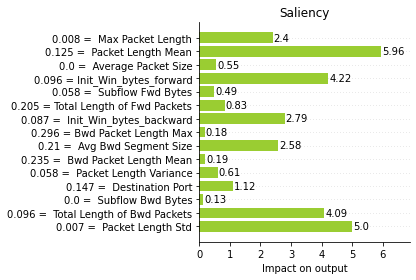

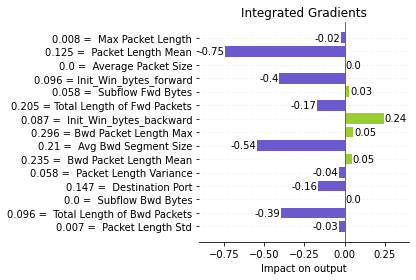

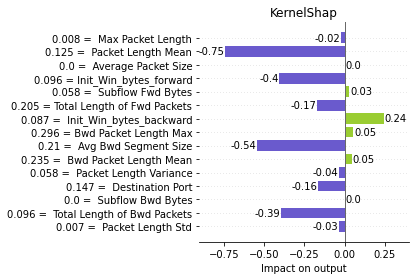

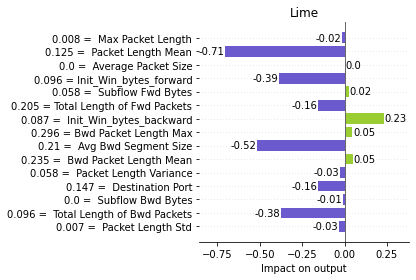

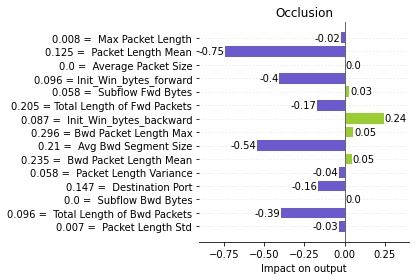

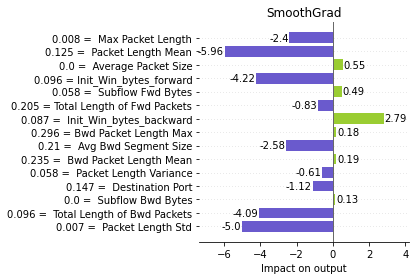

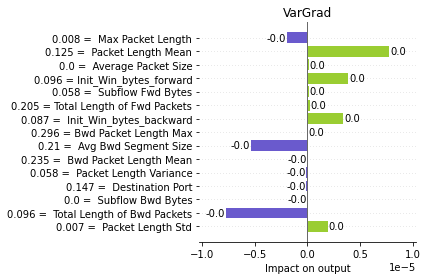

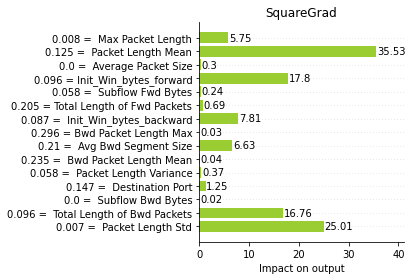

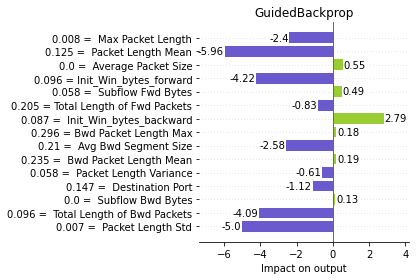

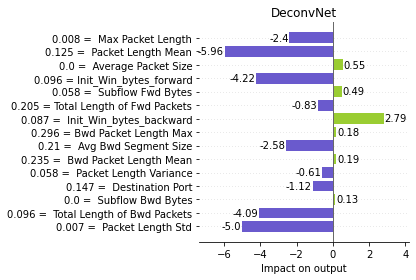

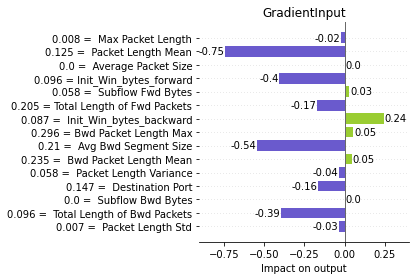

In [149]:
for exp_index, (exp_method, exp) in enumerate(explanations):
    plot_feature_impact(exp[0], features_name, test_features2[0])
    plt.title(exp_method)
    plt.show()

### The mean impact for every sample

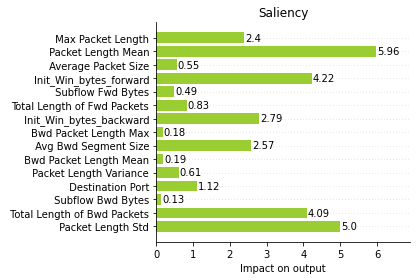

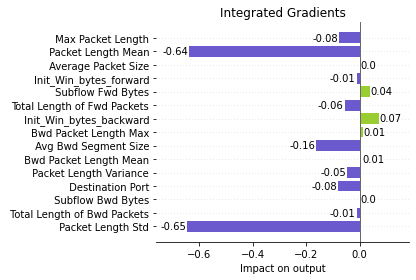

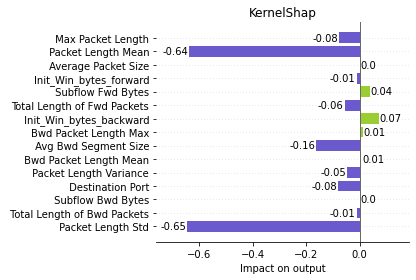

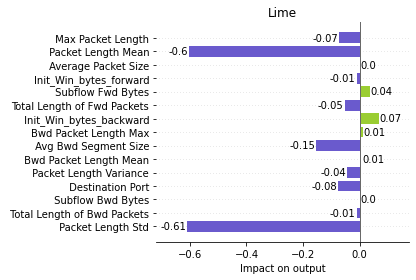

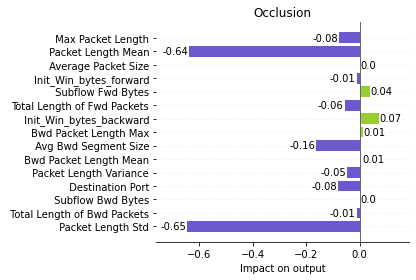

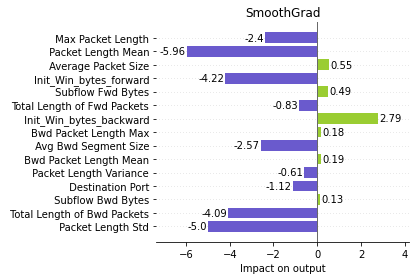

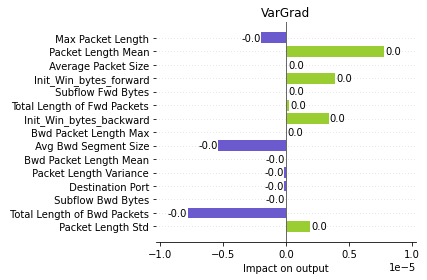

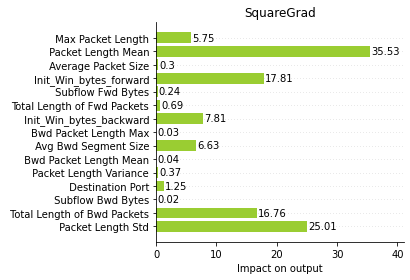

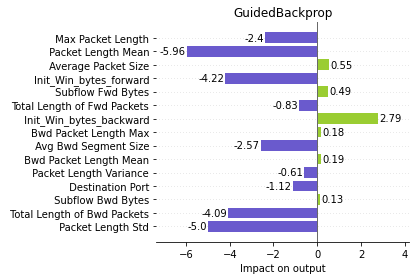

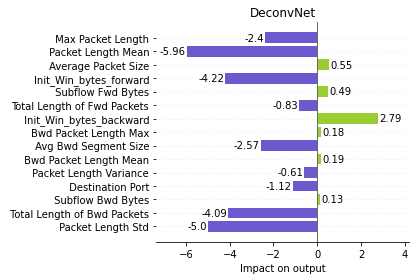

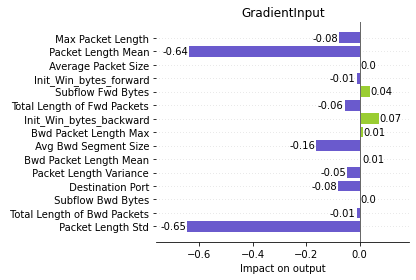

In [150]:
for exp_index, (exp_method, exp) in enumerate(explanations):
    plot_mean_feature_impact(exp, features_name)
    plt.title(exp_method)
    plt.show()

### A much more informative overall plot

In [157]:
# test_features

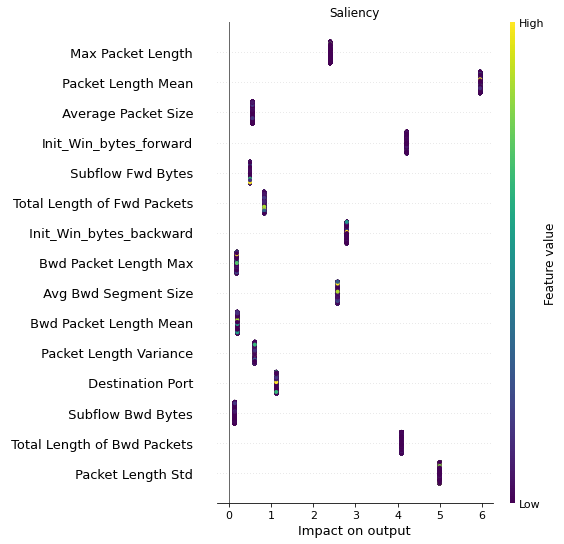

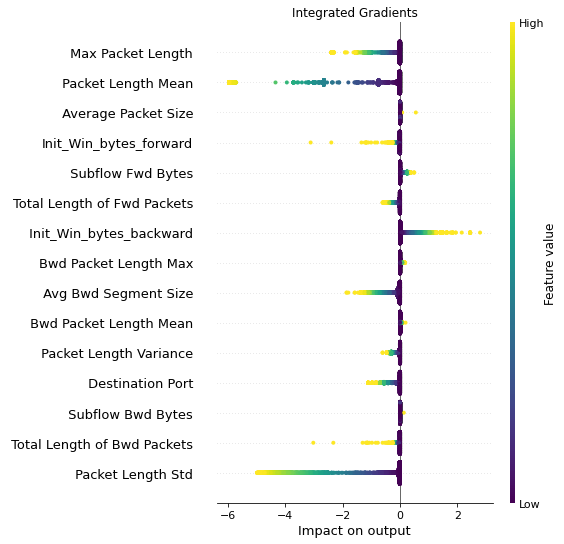

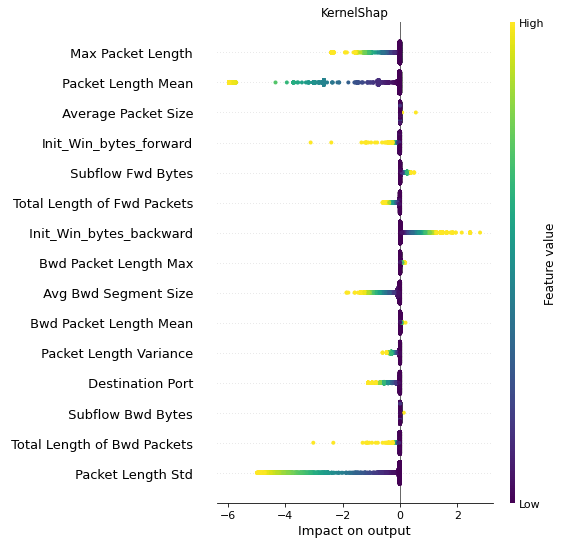

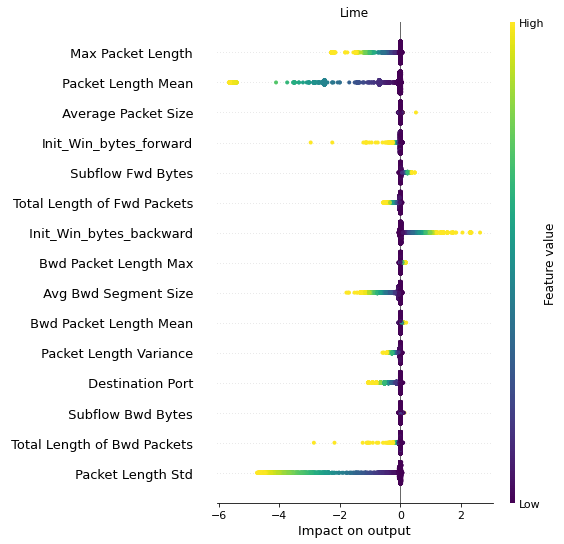

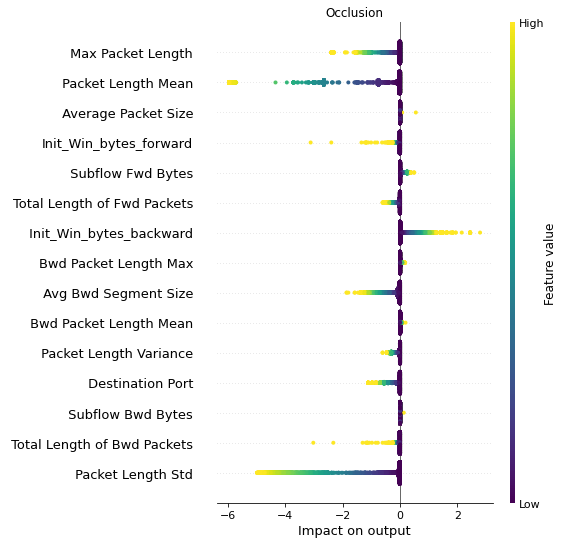

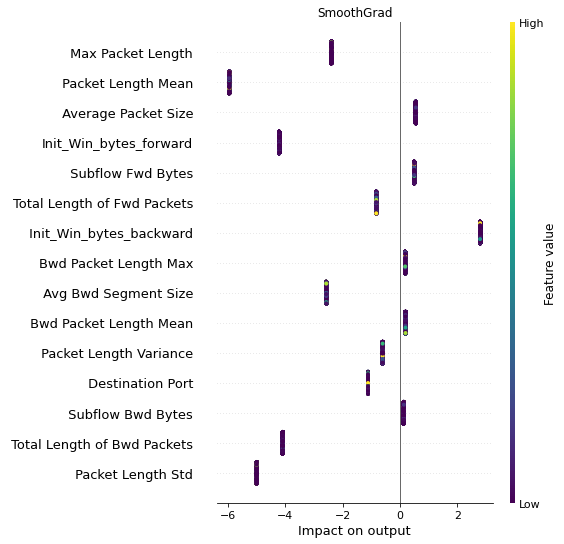

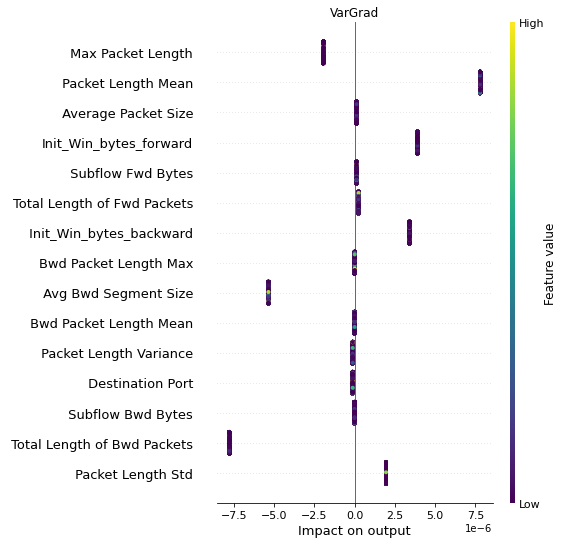

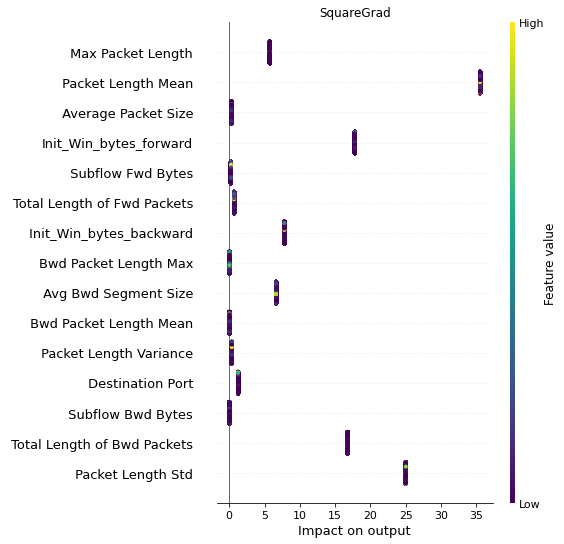

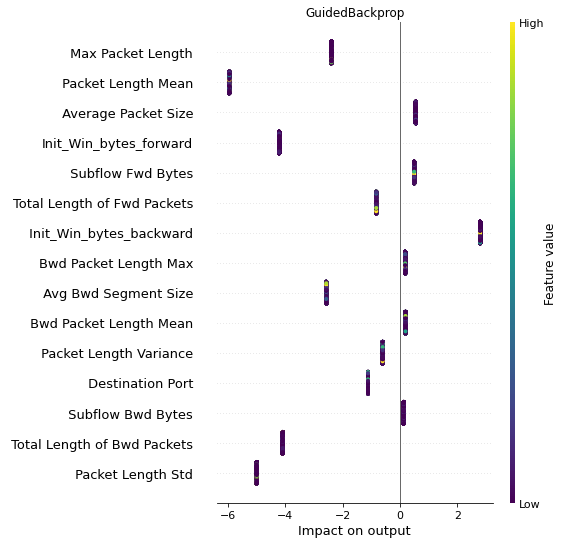

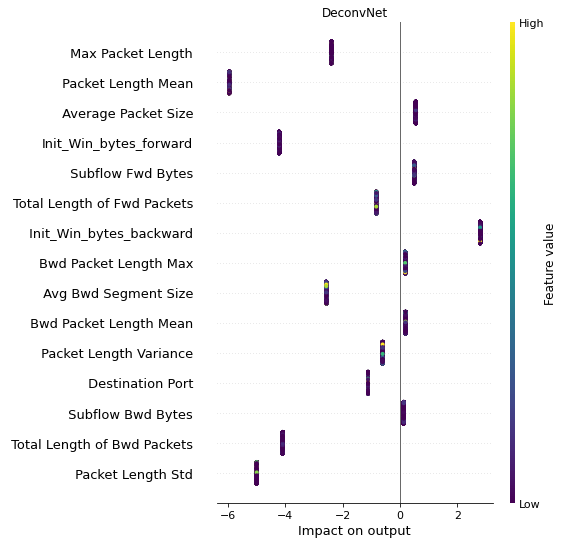

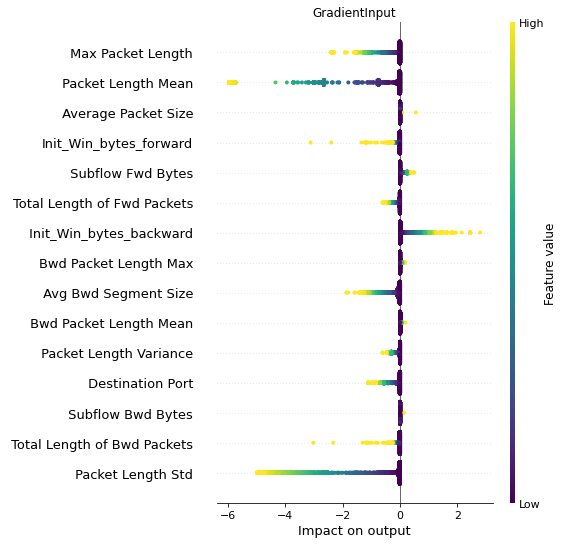

In [156]:
for exp_index, (exp_method, exp) in enumerate(explanations):
    summary_plot_tabular(
        exp,
        features_values=test_features2,
        features_name=features_name,
    )
    plt.title(exp_method)
    plt.show()

At first sight, it seems that the origin of the car got a significant impact towards the prediction. In order to confirm our intuition we will focus on the 4 features which have a mean absolute impact greater than the others.

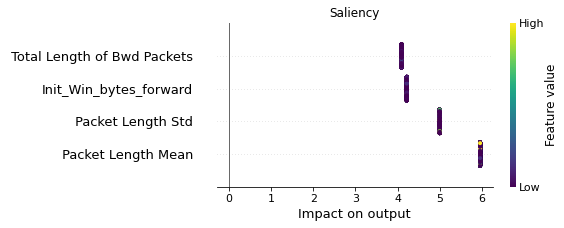

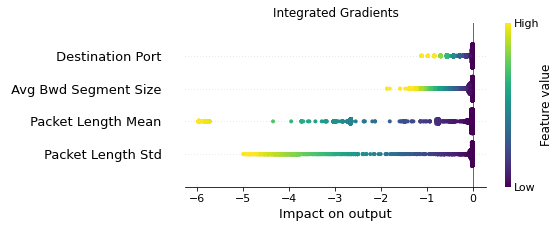

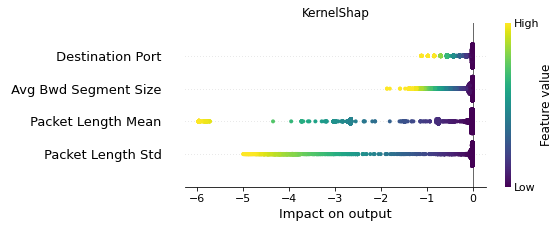

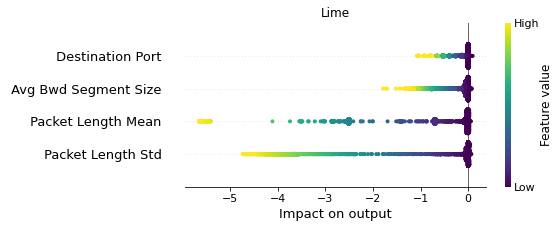

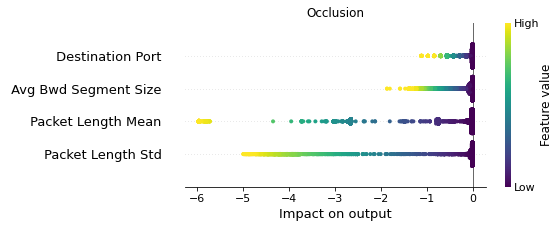

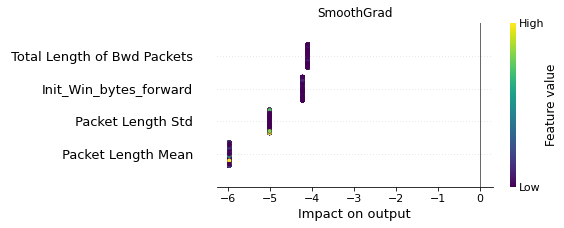

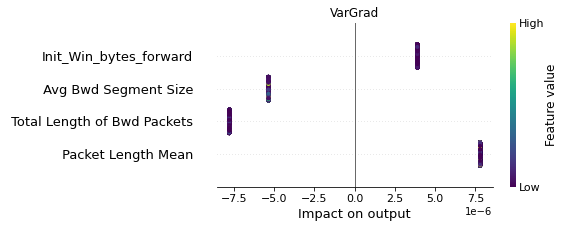

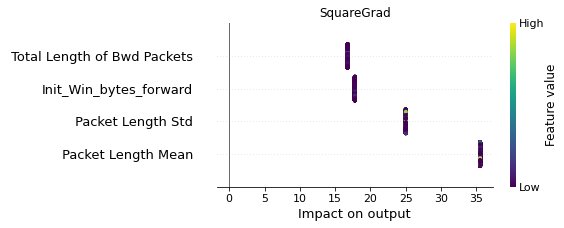

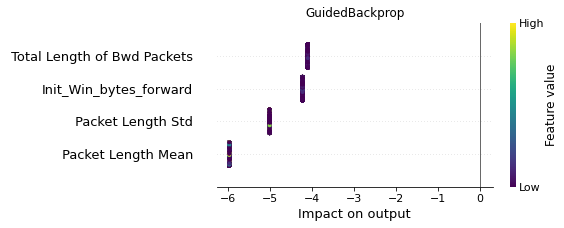

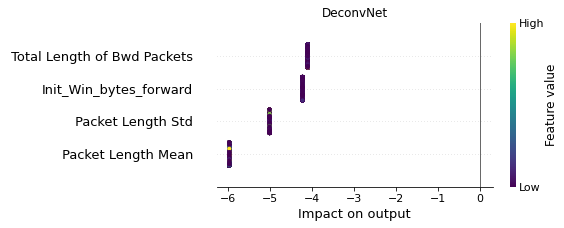

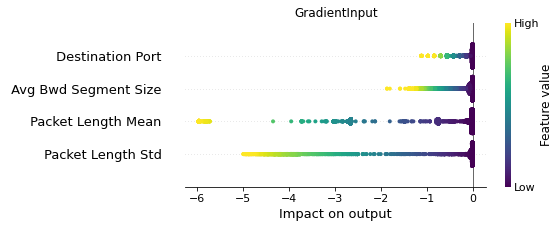

In [158]:
for exp_index, (exp_method, exp) in enumerate(explanations):
    summary_plot_tabular(
        exp,
        features_values = test_features2,
        features_name=features_name,
        max_display=4
    )
    plt.title(exp_method)
    plt.show()

## Leverage Attributions

As expected the origin of the car appears most of the time as a significant feature which can let us believe there is some kind of bias when training our model. Let's investigate that in our data.

In [159]:
label

Index(['BENIGN', 'PortScan', 'Dos/Ddos', 'Brute Force', 'Web Attack', 'Bot',
       'Infiltration'],
      dtype='object')

In [160]:
#dataset_analysis = raw_dataset.copy()

dataset_analysis = df.copy()
# the dataset contains na value, we just drop them
dataset_analysis = dataset_analysis.dropna()

dataset_analysis[' Destination Port'] = dataset_analysis[' Destination Port'].map({1: 'BENIGN', 2: 'PortScan', 3: 'Dos/Ddos', 4: 'Brute Force', 5: 'Web Attack', 6: 'Bot', 7:'Infiltration' })
analysis = dataset_analysis.groupby(' Destination Port')

In [161]:
analysis.mean()

,Total Length of Fwd Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Bwd Packet Length Mean,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,is_train
Destination Port,,,,,,,,,,,,,,,
BENIGN,0.000045,1.271186e-07,0.000258,0.000776,0.000242,0.002213,0.0,0.0,0.003161,0.000776,0.000045,1.268646e-07,0.004929,0.001946,True


In [162]:
analysis.std()

,Total Length of Fwd Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Bwd Packet Length Mean,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,is_train
Destination Port,,,,,,,,,,,,,,,
BENIGN,0.000021,1.797729e-07,0.000365,0.001097,0.0,0.0,0.0,0.0,0.0,0.001097,0.000021,1.794136e-07,0.000798,0.002773,0.0


The origin of the car seems to be a strong baseline towards the prediction and it makes sense especially if the car is coming from the USA.
For instance, considering our explanations and the previous quick analysis we can expect our values to be all shifted if we swap the origin of a car between USA and Europe.
First we will check the performance of the model on cars coming from the USA and then we will pertubed the labels by declaring those cars coming from Europe.

In [163]:
us_val = test_features[:,8]
test_indx_usa = np.where(np.abs(us_val-0.776)<1e-3)

TypeError: '(slice(None, None, None), 8)' is an invalid key

In [ ]:
us_predict = dnn_model.predict(test_features[test_indx_usa]).flatten()

In [ ]:
test_labels_us = test_labels.to_numpy()

array([15. , 10. ,  9. , 19. , 14. , 14. , 13. , 18. , 25. , 13. , 28. ,
       13. , 14. , 15. , 13. , 18. , 12. , 16. , 26. , 16. , 18. , 20. ,
       18. , 19. , 26. , 17.5, 22.5, 29. , 20. , 13. , 36.1, 20.5, 20.8,
       18.1, 30.9, 16.5, 15.5, 18.5, 19.1, 27.9, 26.6, 23.5, 30. , 34.4,
       22.4, 26.6, 28. , 34. , 28. ])

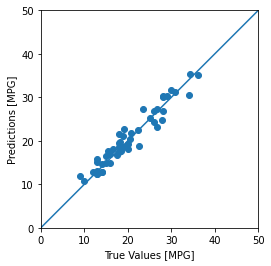

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_us[test_indx_usa], us_predict)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

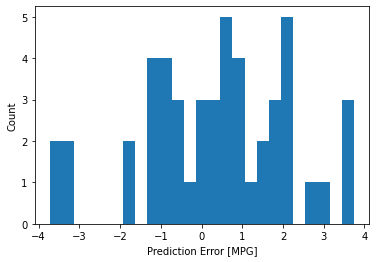

In [ ]:
error = us_predict - test_labels_us[test_indx_usa]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

We will now pertub our model by declaring that cars from the US are from Europe

In [ ]:
pertub_features = test_features[test_indx_usa]
temp = np.copy(pertub_features)
pertub_features[:,8] = pertub_features[:,6]
pertub_features[:,6] = temp[:,8]

In [ ]:
pertub_predict = dnn_model.predict(pertub_features)

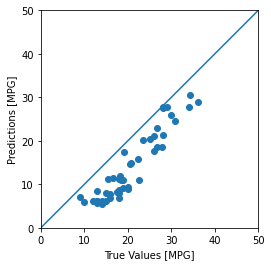

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_us[test_indx_usa], pertub_predict)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

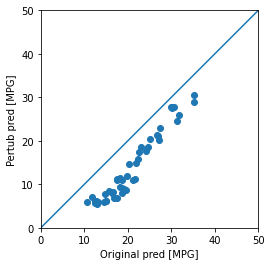

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(us_predict, pertub_predict)
plt.xlabel('Original pred [MPG]')
plt.ylabel('Pertub pred [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
mean_difference = np.mean(np.abs(pertub_predict - us_predict))
std_diff = np.std(np.abs(pertub_predict - us_predict))
print("Mean difference between original and pertubed: %s +- %s"%(mean_difference,std_diff))

Mean difference between original and pertubed: 10.249264 +- 6.7146907


As the explanations highlighted, the origin of the car is significant towards the precision of our prediction!